In [2]:
pip install scikit-image


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.3/13.3 MB 5.5 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 313.3/313.3 kB 5.0 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 5.7 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 224.1/224.1 kB 7.0 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [3]:
import cv2
import numpy as np
from skimage.color import rgb2lab
from skimage.segmentation import slic
from skimage.measure import regionprops

# Function to calculate similarity index
def calculate_similarity(region1, region2):
    # Calculate Euclidean distance between mean color values of the regions
    similarity = np.linalg.norm(region1.mean_color - region2.mean_color)
    return similarity

# Load the image
image = cv2.imread('1.png')

# Convert the image to CIELAB color space
lab_image = rgb2lab(image)

# Perform superpixel segmentation
segments = slic(image, n_segments=100, compactness=10)

# Extract region properties for each segment
props = regionprops(segments, intensity_image=lab_image)

# Assuming you have identified the two tissues you want to compare
# based on some criteria (e.g., manually or using additional segmentation)

# Example: Let's say tissue 1 corresponds to segment with label 1
# and tissue 2 corresponds to segment with label 2
tissue1_region = props[1]  # Change index accordingly
tissue2_region = props[2]  # Change index accordingly

# Calculate similarity index between the two tissues
similarity_index = calculate_similarity(tissue1_region, tissue2_region)

# Print the similarity index
print("Similarity Index between Tissue 1 and Tissue 2:", similarity_index)


AttributeError: '<class 'skimage.measure._regionprops.RegionProperties'>' object has no attribute 'mean_color'

In [5]:
import cv2
import numpy as np
from skimage.color import rgb2lab
from skimage.segmentation import slic
from skimage.measure import regionprops

# Function to calculate mean color value for a region
def calculate_mean_color(image, region):
    return np.mean(image[region], axis=0)

# Function to calculate similarity index
def calculate_similarity(mean_color1, mean_color2):
    # Calculate Euclidean distance between mean color values of the regions
    similarity = np.linalg.norm(mean_color1 - mean_color2)
    return similarity

# Load the image
image = cv2.imread('1.png')

# Convert the image to CIELAB color space
lab_image = rgb2lab(image)

# Perform superpixel segmentation
segments = slic(image, n_segments=100, compactness=10)

# Extract region properties for each segment
props = regionprops(segments)

# Assuming you have identified the two tissues you want to compare
# based on some criteria (e.g., manually or using additional segmentation)

# Example: Let's say tissue 1 corresponds to segment with label 1
# and tissue 2 corresponds to segment with label 2
tissue1_region = props[1].coords  # Change index accordingly
tissue2_region = props[2].coords  # Change index accordingly

# Calculate mean color value for each tissue region
mean_color_tissue1 = calculate_mean_color(lab_image, tissue1_region)
mean_color_tissue2 = calculate_mean_color(lab_image, tissue2_region)

# Calculate similarity index between the two tissues
similarity_index = calculate_similarity(mean_color_tissue1, mean_color_tissue2)

# Print the similarity index
print("Similarity Index between Tissue 1 and Tissue 2:", similarity_index)


Similarity Index between Tissue 1 and Tissue 2: 753.6590645745833


In [3]:
import cv2
import numpy as np
from skimage.color import rgb2lab
from skimage.segmentation import slic
from skimage.measure import regionprops
from sklearn.decomposition import PCA

# Function to calculate mean color value for a region
def calculate_mean_color(image, region):
    return np.mean(image[region], axis=0)

# Function to calculate similarity index
def calculate_similarity(mean_color1, mean_color2):
    # Calculate Euclidean distance between mean color values of the regions
    similarity = np.linalg.norm(mean_color1 - mean_color2)
    return similarity

# Load the image
image = cv2.imread('4.png')

# Convert the image to CIELAB color space
lab_image = rgb2lab(image)

# Extract L channel features
L_channel = lab_image[:,:,0]

# Perform PCA to reduce dimensionality
pca = PCA(n_components=1)
L_pca = pca.fit_transform(L_channel.reshape(-1, 1)).reshape(L_channel.shape)

# Reconstruct image using reduced feature space
lab_image_reconstructed = np.zeros_like(lab_image)
lab_image_reconstructed[:,:,0] = L_pca
lab_image_reconstructed[:,:,1:] = lab_image[:,:,1:]

# Convert reconstructed image back to RGB color space for display
reconstructed_image = cv2.cvtColor(lab_image_reconstructed.astype(np.uint8), cv2.COLOR_LAB2RGB)

# Display original and reconstructed images
cv2.imshow('Original Image', image)
cv2.imshow('Reconstructed Image', reconstructed_image)
cv2.waitKey(0)
cv2.destroyAllWindows()

# Perform superpixel segmentation
segments = slic(image, n_segments=100, compactness=10)

# Extract region properties for each segment
props = regionprops(segments)

# Assuming you have identified the two tissues you want to compare
# based on some criteria (e.g., manually or using additional segmentation)

# Example: Let's say tissue 1 corresponds to segment with label 1
# and tissue 2 corresponds to segment with label 2
tissue1_region = props[1].coords  # Change index accordingly
tissue2_region = props[2].coords  # Change index accordingly

# Calculate mean color value for each tissue region
mean_color_tissue1 = calculate_mean_color(lab_image, tissue1_region)
mean_color_tissue2 = calculate_mean_color(lab_image, tissue2_region)

# Calculate similarity index between the two tissues
similarity_index = calculate_similarity(mean_color_tissue1, mean_color_tissue2)

# Print the similarity index
print("Similarity Index between Tissue 1 and Tissue 2:", similarity_index)


Similarity Index between Tissue 1 and Tissue 2: 150.23983335879288


In [4]:
pip install regionprops

ERROR: Could not find a version that satisfies the requirement regionprops (from versions: none)
ERROR: No matching distribution found for regionprops
Note: you may need to restart the kernel to use updated packages.


In [5]:
import cv2
import numpy as np
from skimage.color import rgb2lab
from sklearn.cluster import KMeans
from skimage.measure import regionprops


# Function to calculate mean color value for a region
def calculate_mean_color(image, region):
    return np.mean(image[region], axis=0)

# Function to calculate similarity index
def calculate_similarity(mean_color1, mean_color2):
    # Calculate Euclidean distance between mean color values of the regions
    similarity = np.linalg.norm(mean_color1 - mean_color2)
    return similarity

# Load the image
image = cv2.imread('2.png')

if image is None:
    print("Error: Image not found or could not be read.")
    exit()

# Convert the image to CIELAB color space
lab_image = rgb2lab(image)

# Reshape the image into a 2D array of pixels
pixels = lab_image.reshape((-1, 3))

# Perform k-means clustering to automatically identify tissue regions
kmeans = KMeans(n_clusters=2, random_state=0)
labels = kmeans.fit_predict(pixels)

# Reshape the labels back into the original image shape
labels = labels.reshape(lab_image.shape[:2])

# Extract region properties for each segment
props = regionprops(labels)

# Assuming the two largest tissue regions correspond to the two tissues
tissue1_region = props[0].coords
tissue2_region = props[1].coords

# Calculate mean color value for each tissue region
mean_color_tissue1 = calculate_mean_color(lab_image, tissue1_region)
mean_color_tissue2 = calculate_mean_color(lab_image, tissue2_region)

# Calculate similarity index between the two tissues
similarity_index = calculate_similarity(mean_color_tissue1, mean_color_tissue2)

# Print the similarity index
print("Similarity Index between Tissue 1 and Tissue 2:", similarity_index)


/Users/amodpathirana/anaconda3/envs/ML_PROJECTS/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


IndexError: list index out of range

In [1]:
import cv2
import numpy as np
from skimage.color import rgb2lab
from sklearn.cluster import KMeans
from skimage.measure import regionprops


# Function to calculate mean color value for a region
def calculate_mean_color(image, region):
    return np.mean(image[region], axis=0)

# Function to calculate similarity index
def calculate_similarity(mean_color1, mean_color2):
    # Calculate Euclidean distance between mean color values of the regions
    similarity = np.linalg.norm(mean_color1 - mean_color2)
    return similarity

# Load the image
image = cv2.imread('4.png')

if image is None:
    print("Error: Image not found or could not be read.")
    exit()

# Convert the image to CIELAB color space
lab_image = rgb2lab(image)

# Reshape the image into a 2D array of pixels
pixels = lab_image.reshape((-1, 3))

# Perform k-means clustering to automatically identify tissue regions
kmeans = KMeans(n_clusters=2, random_state=0)
labels = kmeans.fit_predict(pixels)

# Reshape the labels back into the original image shape
labels = labels.reshape(lab_image.shape[:2])

# Extract region properties for each segment
props = regionprops(labels)

# Ensure that at least two regions are identified
if len(props) < 2:
    print("Error: Unable to identify two tissue regions.")
    exit()

# Assuming the two largest tissue regions correspond to the two tissues
tissue1_region = props[0].coords
tissue2_region = props[1].coords

# Calculate mean color value for each tissue region
mean_color_tissue1 = calculate_mean_color(lab_image, tissue1_region)
mean_color_tissue2 = calculate_mean_color(lab_image, tissue2_region)

# Calculate similarity index between the two tissues
similarity_index = calculate_similarity(mean_color_tissue1, mean_color_tissue2)

# Print the similarity index
print("Similarity Index between Tissue 1 and Tissue 2:", similarity_index)


/Users/amodpathirana/anaconda3/envs/ML_PROJECTS/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Error: Unable to identify two tissue regions.


IndexError: list index out of range

In [1]:
import cv2
import numpy as np
from skimage.color import rgb2lab
from sklearn.cluster import KMeans
from skimage.measure import regionprops


# Function to calculate mean color value for a region
def calculate_mean_color(image, region):
    return np.mean(image[region], axis=0)

# Function to calculate similarity index
def calculate_similarity(mean_color1, mean_color2):
    # Calculate Euclidean distance between mean color values of the regions
    similarity = np.linalg.norm(mean_color1 - mean_color2)
    return similarity

# Load the image
image = cv2.imread('4.png')

if image is None:
    print("Error: Image not found or could not be read.")
    exit()

# Convert the image to CIELAB color space
lab_image = rgb2lab(image)

# Preprocess the image (e.g., histogram equalization, noise reduction, etc.)
# You can add preprocessing steps here if needed

# Reshape the image into a 2D array of pixels
pixels = lab_image.reshape((-1, 3))

# Perform k-means clustering to automatically identify tissue regions
kmeans = KMeans(n_clusters=2, random_state=0, n_init=50)  # Adjust parameters as needed
labels = kmeans.fit_predict(pixels)

# Reshape the labels back into the original image shape
labels = labels.reshape(lab_image.shape[:2])

# Extract region properties for each segment
props = regionprops(labels)

# Ensure that at least two regions are identified
if len(props) < 2:
    print("Error: Unable to identify two tissue regions.")
    exit()

# Assuming the two largest tissue regions correspond to the two tissues
tissue1_region = props[0].coords
tissue2_region = props[1].coords

# Calculate mean color value for each tissue region
mean_color_tissue1 = calculate_mean_color(lab_image, tissue1_region)
mean_color_tissue2 = calculate_mean_color(lab_image, tissue2_region)

# Calculate similarity index between the two tissues
similarity_index = calculate_similarity(mean_color_tissue1, mean_color_tissue2)

# Print the similarity index
print("Similarity Index between Tissue 1 and Tissue 2:", similarity_index)


Error: Unable to identify two tissue regions.


IndexError: list index out of range

In [1]:
import cv2
import numpy as np
from skimage.color import rgb2lab
from sklearn.cluster import KMeans
from skimage.measure import regionprops


# Function to calculate mean color value for a region
def calculate_mean_color(image, region):
    return np.mean(image[region], axis=0)

# Function to calculate similarity index
def calculate_similarity(mean_color1, mean_color2):
    # Calculate Euclidean distance between mean color values of the regions
    similarity = np.linalg.norm(mean_color1 - mean_color2)
    return similarity

# Load the image
image = cv2.imread('4.png')

if image is None:
    print("Error: Image not found or could not be read.")
    exit()

# Convert the image to CIELAB color space
lab_image = rgb2lab(image)

# Preprocess the image (e.g., histogram equalization, noise reduction, etc.)
# You can add preprocessing steps here if needed

# Reshape the image into a 2D array of pixels
pixels = lab_image.reshape((-1, 3))

# Perform k-means clustering to automatically identify tissue regions
kmeans = KMeans(n_clusters=2, random_state=0, n_init=50)  # Adjust parameters as needed
labels = kmeans.fit_predict(pixels)

# Reshape the labels back into the original image shape
labels = labels.reshape(lab_image.shape[:2])

# Extract region properties for each segment
props = regionprops(labels)

# Ensure that at least two regions are identified
if len(props) < 2:
    print("Error: Unable to identify two tissue regions.")
    exit()

# Assuming the two largest tissue regions correspond to the two tissues
tissue_regions = sorted(props, key=lambda x: x.area, reverse=True)[:2]

# Calculate mean color value for each tissue region
mean_color_tissue1 = calculate_mean_color(lab_image, tissue_regions[0].coords)
mean_color_tissue2 = calculate_mean_color(lab_image, tissue_regions[1].coords)

# Calculate similarity index between the two tissues
similarity_index = calculate_similarity(mean_color_tissue1, mean_color_tissue2)

# Print the similarity index
print("Similarity Index between Tissue 1 and Tissue 2:", similarity_index)


Error: Unable to identify two tissue regions.


IndexError: index 438 is out of bounds for axis 0 with size 438

In [1]:
import cv2
import numpy as np
from skimage.color import rgb2lab
from sklearn.cluster import KMeans
from skimage.measure import regionprops


# Function to calculate mean color value for a region
def calculate_mean_color(image, region):
    return np.mean(image[region], axis=0)

# Function to calculate similarity index
def calculate_similarity(mean_color1, mean_color2):
    # Calculate Euclidean distance between mean color values of the regions
    similarity = np.linalg.norm(mean_color1 - mean_color2)
    return similarity

# Load the image
image = cv2.imread('4.png')

if image is None:
    print("Error: Image not found or could not be read.")
    exit()

# Convert the image to CIELAB color space
lab_image = rgb2lab(image)

# Preprocess the image (e.g., histogram equalization, noise reduction, etc.)
# You can add preprocessing steps here if needed

# Reshape the image into a 2D array of pixels
pixels = lab_image.reshape((-1, 3))

# Perform k-means clustering to automatically identify tissue regions
kmeans = KMeans(n_clusters=2, random_state=0, n_init=50)  # Adjust parameters as needed
labels = kmeans.fit_predict(pixels)

# Reshape the labels back into the original image shape
labels = labels.reshape(lab_image.shape[:2])

# Extract region properties for each segment
props = regionprops(labels)

# Ensure that at least two regions are identified
if len(props) < 2:
    print("Error: Unable to identify two tissue regions.")
    exit()

# Assuming the two largest tissue regions correspond to the two tissues
tissue_regions = sorted(props, key=lambda x: x.area, reverse=True)[:2]

# Calculate mean color value for each tissue region
mean_color_tissue1 = calculate_mean_color(lab_image, tissue_regions[0].coords)
mean_color_tissue2 = calculate_mean_color(lab_image, tissue_regions[1].coords)

# Calculate similarity index between the two tissues
similarity_index = calculate_similarity(mean_color_tissue1, mean_color_tissue2)

# Print the similarity index
print("Similarity Index between Tissue 1 and Tissue 2:", similarity_index)


Error: Unable to identify two tissue regions.


IndexError: index 438 is out of bounds for axis 0 with size 438

In [1]:
import cv2
import numpy as np
from skimage.color import rgb2lab
from sklearn.cluster import KMeans
from skimage.measure import regionprops


# Function to calculate mean color value for a region
def calculate_mean_color(image, region):
    return np.mean(image[region], axis=0)

# Function to calculate similarity index
def calculate_similarity(mean_color1, mean_color2):
    # Calculate Euclidean distance between mean color values of the regions
    similarity = np.linalg.norm(mean_color1 - mean_color2)
    return similarity

# Load the image
image = cv2.imread('4.png')

if image is None:
    print("Error: Image not found or could not be read.")
    exit()

# Convert the image to CIELAB color space
lab_image = rgb2lab(image)

# Preprocess the image (e.g., histogram equalization, noise reduction, etc.)
# You can add preprocessing steps here if needed

# Reshape the image into a 2D array of pixels
pixels = lab_image.reshape((-1, 3))

# Perform k-means clustering to automatically identify tissue regions
kmeans = KMeans(n_clusters=2, random_state=0, n_init=50)  # Adjust parameters as needed
labels = kmeans.fit_predict(pixels)

# Reshape the labels back into the original image shape
labels = labels.reshape(lab_image.shape[:2])

# Extract region properties for each segment
props = regionprops(labels)

# Ensure that at least two regions are identified
if len(props) < 2:
    print("Error: Unable to identify two tissue regions.")
    exit()

# Assuming the two largest tissue regions correspond to the two tissues
tissue_regions = sorted(props, key=lambda x: x.area, reverse=True)[:2]

# Calculate mean color value for each tissue region
mean_color_tissue1 = calculate_mean_color(lab_image, tissue_regions[0].coords)
mean_color_tissue2 = calculate_mean_color(lab_image, tissue_regions[1].coords)

# Ensure that the coordinates are within bounds
if len(mean_color_tissue1) == 0 or len(mean_color_tissue2) == 0:
    print("Error: Unable to calculate mean color values for tissue regions.")
    exit()

# Calculate similarity index between the two tissues
similarity_index = calculate_similarity(mean_color_tissue1, mean_color_tissue2)

# Print the similarity index
print("Similarity Index between Tissue 1 and Tissue 2:", similarity_index)


Error: Unable to identify two tissue regions.


IndexError: index 438 is out of bounds for axis 0 with size 438

In [1]:
import cv2
import numpy as np
from skimage.color import rgb2lab
from sklearn.cluster import KMeans
from skimage.measure import regionprops
from skimage.segmentation import relabel_sequential

# Function to calculate mean color value for a region
def calculate_mean_color(image, region):
    return np.mean(image[region], axis=0)

# Function to calculate similarity index
def calculate_similarity(mean_color1, mean_color2):
    # Calculate Euclidean distance between mean color values of the regions
    similarity = np.linalg.norm(mean_color1 - mean_color2)
    return similarity

# Load the image
image = cv2.imread('4.png')

if image is None:
    print("Error: Image not found or could not be read.")
    exit()

# Convert the image from BGR to RGB
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Convert the image to CIELAB color space
lab_image = rgb2lab(image)

# Preprocess the image (e.g., histogram equalization, noise reduction, etc.)
# You can add preprocessing steps here if needed

# Reshape the image into a 2D array of pixels
pixels = lab_image.reshape((-1, 3))

# Perform k-means clustering to automatically identify tissue regions
kmeans = KMeans(n_clusters=2, random_state=0, n_init=50)  # Adjust parameters as needed
labels = kmeans.fit_predict(pixels)

# Reshape the labels back into the original image shape
labels = labels.reshape(lab_image.shape[:2])

# Ensure labels are sequentially numbered and separated
labels, _, _ = relabel_sequential(labels)

# Extract region properties for each segment
props = regionprops(labels)

# Check if regions are found
if len(props) < 2:
    print("Error: Unable to identify two tissue regions.")
    exit()

# Assuming the two largest tissue regions correspond to the two tissues
tissue_regions = sorted(props, key=lambda x: x.area, reverse=True)[:2]

# Calculate mean color value for each tissue region
mean_color_tissue1 = calculate_mean_color(lab_image, tissue_regions[0].coords)
mean_color_tissue2 = calculate_mean_color(lab_image, tissue_regions[1].coords)

# Calculate similarity index between the two tissues
similarity_index = calculate_similarity(mean_color_tissue1, mean_color_tissue2)

# Print the similarity index
print("Similarity Index between Tissue 1 and Tissue 2:", similarity_index)


Error: Unable to identify two tissue regions.


IndexError: index 438 is out of bounds for axis 0 with size 438

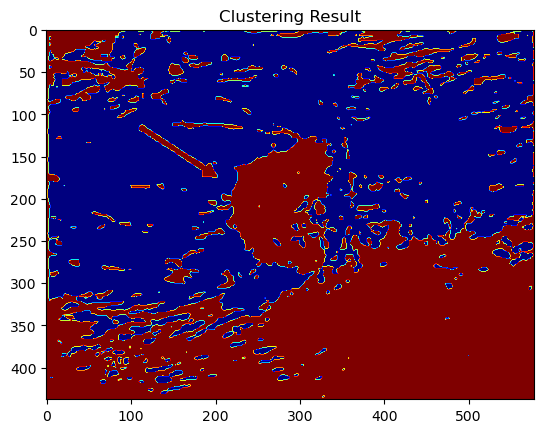

Error: Unable to identify two tissue regions.


IndexError: list index out of range

In [1]:
import cv2
import numpy as np
from skimage.color import rgb2lab, lab2rgb
from sklearn.cluster import KMeans
from skimage.measure import regionprops
from skimage.segmentation import relabel_sequential
import matplotlib.pyplot as plt

# Function to calculate mean color value for a region
def calculate_mean_color(image, region_coords):
    rows, cols = zip(*region_coords)
    return np.mean(image[rows, cols], axis=0)

# Function to calculate similarity index
def calculate_similarity(mean_color1, mean_color2):
    similarity = np.linalg.norm(mean_color1 - mean_color2)
    return similarity

# Load the image
image = cv2.imread('4.png')

if image is None:
    print("Error: Image not found or could not be read.")
    exit()

# Convert the image from BGR to RGB
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Convert the image to CIELAB color space
lab_image = rgb2lab(image)

# Reshape the image into a 2D array of pixels
pixels = lab_image.reshape((-1, 3))

# Perform k-means clustering
kmeans = KMeans(n_clusters=2, random_state=0, n_init=50)
labels = kmeans.fit_predict(pixels)

# Reshape the labels
labels = labels.reshape(lab_image.shape[:2])

# Ensure labels are sequentially numbered
labels, _, _ = relabel_sequential(labels)

# Check the number of unique labels
if len(np.unique(labels)) != 2:
    print("Error: k-means did not produce two distinct regions.")
    exit()

# Extract region properties
props = regionprops(labels)

# Visualize the clustering result
plt.imshow(labels, cmap='jet')
plt.title('Clustering Result')
plt.show()

# Check if two regions are found
if len(props) < 2:
    print("Error: Unable to identify two tissue regions.")
    exit()

# Calculate mean color values for each region
mean_color_tissue1 = calculate_mean_color(lab_image, props[0].coords)
mean_color_tissue2 = calculate_mean_color(lab_image, props[1].coords)

# Calculate similarity index
similarity_index = calculate_similarity(mean_color_tissue1, mean_color_tissue2)

# Print the similarity index
print("Similarity Index between Tissue 1 and Tissue 2:", similarity_index)


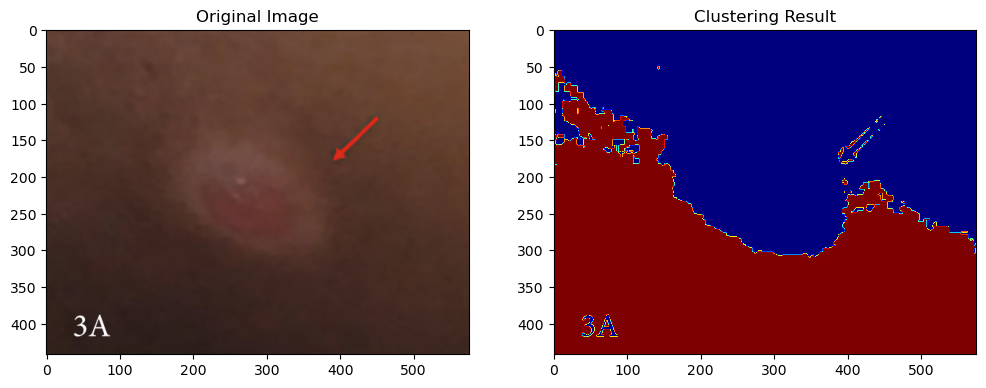

Unique labels after clustering: [0 1]
Error: Unable to identify two tissue regions.


IndexError: list index out of range

In [1]:
import cv2
import numpy as np
from skimage.color import rgb2lab
from sklearn.cluster import KMeans
from skimage.measure import regionprops
from skimage.segmentation import relabel_sequential
import matplotlib.pyplot as plt

# Function to calculate mean color value for a region
def calculate_mean_color(image, region_coords):
    rows, cols = zip(*region_coords)
    return np.mean(image[rows, cols], axis=0)

# Function to calculate similarity index
def calculate_similarity(mean_color1, mean_color2):
    similarity = np.linalg.norm(mean_color1 - mean_color2)
    return similarity

# Load the image
image_path = '3.png'
image = cv2.imread(image_path)

if image is None:
    print(f"Error: Image at {image_path} not found or could not be read.")
    exit()

# Convert the image from BGR to RGB
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Convert the image to CIELAB color space
lab_image = rgb2lab(image)

# Reshape the image into a 2D array of pixels
pixels = lab_image.reshape((-1, 3))

# Perform k-means clustering
kmeans = KMeans(n_clusters=2, random_state=0, n_init=50)
labels = kmeans.fit_predict(pixels)

# Reshape the labels
labels = labels.reshape(lab_image.shape[:2])

# Ensure labels are sequentially numbered
labels, _, _ = relabel_sequential(labels)

# Visualize the original image and clustering result
fig, ax = plt.subplots(1, 2, figsize=(12, 6))
ax[0].imshow(image)
ax[0].set_title('Original Image')
ax[1].imshow(labels, cmap='jet')
ax[1].set_title('Clustering Result')
plt.show()

# Check the number of unique labels
unique_labels = np.unique(labels)
print(f"Unique labels after clustering: {unique_labels}")

if len(unique_labels) != 2:
    print("Error: k-means did not produce two distinct regions.")
    exit()

# Extract region properties
props = regionprops(labels)

if len(props) < 2:
    print("Error: Unable to identify two tissue regions.")
    exit()

# Calculate mean color values for each region
mean_color_tissue1 = calculate_mean_color(lab_image, props[0].coords)
mean_color_tissue2 = calculate_mean_color(lab_image, props[1].coords)

# Calculate similarity index
similarity_index = calculate_similarity(mean_color_tissue1, mean_color_tissue2)

# Print the similarity index
print("Similarity Index between Tissue 1 and Tissue 2:", similarity_index)


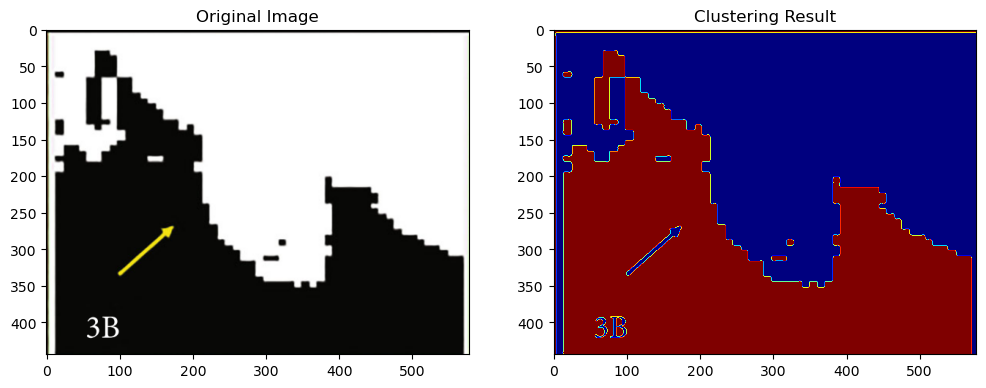

Unique labels after clustering: [0 1]
Similarity Index between Tissue 1 and Tissue 2: 95.72138674518716


In [4]:
import cv2
import numpy as np
from skimage.color import rgb2lab
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Function to calculate mean color value for a given label
def calculate_mean_color_from_label(image, labels, label):
    mask = labels == label
    return np.mean(image[mask], axis=0)

# Function to calculate similarity index
def calculate_similarity(mean_color1, mean_color2):
    similarity = np.linalg.norm(mean_color1 - mean_color2)
    return similarity

# Load the image
image_path = '1.png'
image = cv2.imread(image_path)

if image is None:
    print(f"Error: Image at {image_path} not found or could not be read.")
    exit()

# Convert the image from BGR to RGB
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Convert the image to CIELAB color space
lab_image = rgb2lab(image)

# Reshape the image into a 2D array of pixels
pixels = lab_image.reshape((-1, 3))

# Perform k-means clustering
kmeans = KMeans(n_clusters=2, random_state=0, n_init=50)
labels = kmeans.fit_predict(pixels)

# Reshape the labels
labels = labels.reshape(lab_image.shape[:2])

# Visualize the original image and clustering result
fig, ax = plt.subplots(1, 2, figsize=(12, 6))
ax[0].imshow(image)
ax[0].set_title('Original Image')
ax[1].imshow(labels, cmap='jet')
ax[1].set_title('Clustering Result')
plt.show()

# Check the number of unique labels
unique_labels = np.unique(labels)
print(f"Unique labels after clustering: {unique_labels}")

if len(unique_labels) != 2:
    print("Error: k-means did not produce two distinct regions.")
    exit()

# Calculate mean color values for each cluster
mean_color_tissue1 = calculate_mean_color_from_label(lab_image, labels, unique_labels[0])
mean_color_tissue2 = calculate_mean_color_from_label(lab_image, labels, unique_labels[1])

# Calculate similarity index
similarity_index = calculate_similarity(mean_color_tissue1, mean_color_tissue2)

# Print the similarity index
print("Similarity Index between Tissue 1 and Tissue 2:", similarity_index)


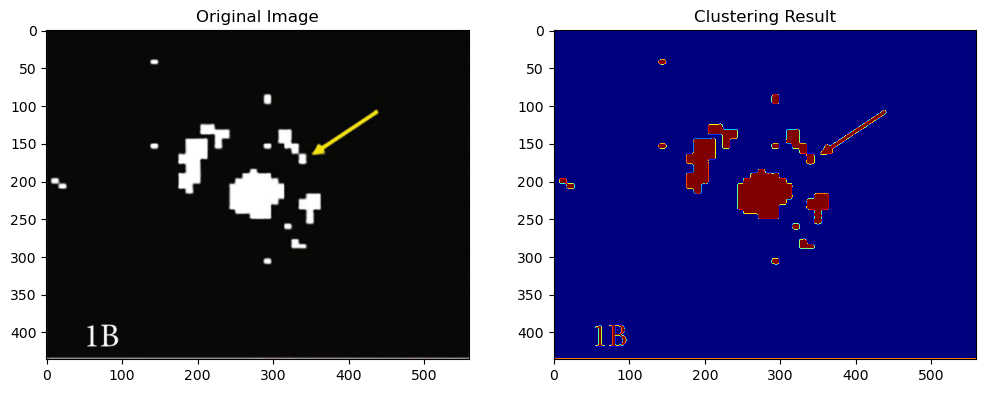

Unique labels after clustering: [0 1]
Similarity Index between Tissue 1 and Tissue 2: 87.76885490726019


In [4]:
import cv2
import numpy as np
from skimage.color import rgb2lab
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Function to calculate mean color value for a given label
def calculate_mean_color_from_label(image, labels, label):
    mask = labels == label
    return np.mean(image[mask], axis=0)

# Function to calculate similarity index
def calculate_similarity(mean_color1, mean_color2):
    similarity = np.linalg.norm(mean_color1 - mean_color2)
    return similarity

# Load the image
image_path = '2.png'
image = cv2.imread(image_path)

if image is None:
    print(f"Error: Image at {image_path} not found or could not be read.")
    exit()

# Convert the image from BGR to RGB
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Convert the image to CIELAB color space
lab_image = rgb2lab(image)

# Reshape the image into a 2D array of pixels
pixels = lab_image.reshape((-1, 3))

# Perform k-means clustering
kmeans = KMeans(n_clusters=2, random_state=0, n_init=50)
labels = kmeans.fit_predict(pixels)

# Reshape the labels
labels = labels.reshape(lab_image.shape[:2])

# Visualize the original image and clustering result
fig, ax = plt.subplots(1, 2, figsize=(12, 6))
ax[0].imshow(image)
ax[0].set_title('Original Image')
ax[1].imshow(labels, cmap='jet')
ax[1].set_title('Clustering Result')
plt.show()

# Check the number of unique labels
unique_labels = np.unique(labels)
print(f"Unique labels after clustering: {unique_labels}")

if len(unique_labels) != 2:
    print("Error: k-means did not produce two distinct regions.")
    exit()

# Calculate mean color values for each cluster
mean_color_tissue1 = calculate_mean_color_from_label(lab_image, labels, unique_labels[0])
mean_color_tissue2 = calculate_mean_color_from_label(lab_image, labels, unique_labels[1])

# Calculate similarity index
similarity_index = calculate_similarity(mean_color_tissue1, mean_color_tissue2)

# Print the similarity index
print("Similarity Index between Tissue 1 and Tissue 2:", similarity_index)
